#### Import statements

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import csv
import collections
import openpyxl

## Data understanding

##### identifying duplicate column names in loan dataset

In [2]:
with open('loan.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    columns = next(reader)
    # printing total # of columns
    print('\nTotal # of columns available in loan dataset:', len(columns))
    count = collections.Counter(columns)
    duplicate_col = [name for name, cnt in count.items() if cnt > 1]
    # printing duplicate column names
    if duplicate_col:
        print('\nDuplicate column names:', duplicate_col)
    else:
        print('\nNo duplicate column names found')


Total # of columns available in loan dataset: 111

No duplicate column names found


##### Reading Data Dictionary 

In [3]:
# Reading Data Dictionary 
data_dict = openpyxl.load_workbook('Data_Dictionary.xlsx')
LoanStats = data_dict.active
variable_name = []
for row in LoanStats.iter_rows(min_row=2, min_col=1, max_col=1, values_only=True):
    # append the cell value to the data list
    variable_name.append(row[0])
# print the total # of variables in Data Dictionary 
print('\nTotal # of variables available in Data Dict:', len(variable_name))


Total # of variables available in Data Dict: 117


##### identifying missing & mismatching column names in loan dataset 

In [4]:
missing_list = [var for var in variable_name if var not in columns]
print('\nTotal Missing Variables/Columns in the Loan Dataset but available in the Data Dict:', missing_list)


Total Missing Variables/Columns in the Loan Dataset but available in the Data Dict: ['fico_range_high', 'fico_range_low', 'last_fico_range_high', 'last_fico_range_low', 'total_rev_hi_lim \xa0', 'verified_status_joint', None, None]


1. The Variable 'verified_status_joint' in the Data Dict is actually the variable/Column 'verification_status_joint' in the Loan dataset. 

##### checking for no of rows and columns in DF

In [5]:
df=pd.read_csv('loan.csv', low_memory=False)
print ('\nTotal # of rows and columns in loan.csv file:', df.shape)


Total # of rows and columns in loan.csv file: (39717, 111)


In [6]:
df.info()
for dt1 in columns:
    print(dt1,'-',df[dt1].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
id - int64
member_id - int64
loan_amnt - int64
funded_amnt - int64
funded_amnt_inv - float64
term - object
int_rate - object
installment - float64
grade - object
sub_grade - object
emp_title - object
emp_length - object
home_ownership - object
annual_inc - float64
verification_status - object
issue_d - object
loan_status - object
pymnt_plan - object
url - object
desc - object
purpose - object
title - object
zip_code - object
addr_state - object
dti - float64
delinq_2yrs - int64
earliest_cr_line - object
inq_last_6mths - int64
mths_since_last_delinq - float64
mths_since_last_record - float64
open_acc - int64
pub_rec - int64
revol_bal - int64
revol_util - object
total_acc - int64
initial_list_status - object
out_prncp - float64
out_prncp_inv - float64
total_pymnt - float64
total_pymnt_inv - flo

2. Checklist for Fixing Rows 
I) Delete summary rows - None

II) Delete incorrect rows - None

III) Delete extra rows – There are no blank rows in the given dataset

3. Checklist for Fixing Columns
I) Merge columns for creating unique identifiers if needed - NA

II) Split columns for more data - NA

III) Add column names - All column names are unique and its relevant info is available in Data Dict.

IV) Rename columns consistently - Please refer to point # 1 on the column/variable name which is not aligning with Data Dict.

V) Delete columns - All column names are valid and unnecessary columns which are not applicable for the analysis would be removed as part of Data cleanup. 

VI) Align misaligned columns - NA



4. Standardise Numbers
I) Non-standard units - None

II) Values with varying Scales -  None

III) Over-precision
    a) 'funded_amnt_inv' - some of the amount is available as Float and that can be rounded off to whole no/INT
    b) 'annual_inc' - some of the values are available as Float and can be rounded off to whole no/INT
    c) 'total_pymnt' - Though most of the values are available as Float but it can be rounded off to 2 decimal places

IV) Outliers
    a) 'annual_inc' - This Variable has user income ranging from 4000 to 6000000 hence this can be figured out through box plot

4. Standardise Text
I) Extra characters. Standardise Text - None

II) Different cases of same words
    a) 'emp_title' variable can be standardised from All uppercase to Title Case but currently this variable is not going to be used for analysis so no changes done. 
    
III) Non-standard formats
    a) All Date fields are given in standard format as 'mm-dd-yyyy'
    b) 'term' is also mentoined in months so no changes 
    



5. Variables classification 

Categorical Variables
a) grade
b) sub_grade
c) home_ownership
d) verification_status
e) loan_status
f) purpose
h) addr_state

Continous Variables
a) loan_amnt, funded_amnt, funded_amnt_inv
b) term
c) int_rate, installment
e) annual_inc
f) issue_d, earliest_cr_line
g) dti
h) emp_length


## Data Cleaning and Manipulation

In [7]:
# Assumption
# df - Original pandas dataframe after reading the loan.csv
# df1 - modified pandas dataframe after removing the non essential columns for analysis

#-----Removing Columns from the dataframe which are not required for the analysis-----#
# Outlier treatment
df1 = df.drop(df.columns[48:111], axis=1)
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16


In [8]:
# printing value count for each column in dataframe
for i in df1.columns:
  print(i,df1[i].value_counts(),"\n")

id 1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: id, Length: 39717, dtype: int64 

member_id 1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64 

loan_amnt 10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64 

funded_amnt 10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: funded_amnt, Length: 1041, dtype: int64 

funded_amnt_inv 5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.8

total_rec_late_fee 0.000000     37671
15.000000      255
15.000000       58
30.000000       55
15.000000       47
             ...  
35.286832        1
15.000000        1
14.777500        1
14.967774        1
19.890000        1
Name: total_rec_late_fee, Length: 1356, dtype: int64 

recoveries 0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: recoveries, Length: 4040, dtype: int64 

collection_recovery_fee 0.0000      35935
2.0000         12
1.2000         10
3.7100          9
1.8800          8
            ...  
3.7900          1
773.4900        1
272.8250        1
1.7697          1
0.2300          1
Name: collection_recovery_fee, Length: 2616, dtype: int64 

last_pymnt_d May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_p

In [9]:
# Updating the 'emp_length' data for 10+ years & < 1 year to 10 & 0 year as provided in the Data dict
df1['emp_length'].where(df1['emp_length'] != '10+ years', other='10 years', inplace=True)
df1['emp_length'].where(df1['emp_length'] != '< 1 year', other='0 year', inplace=True)
df1['emp_length'].head(10)

0    10 years
1      0 year
2    10 years
3    10 years
4      1 year
5     3 years
6     8 years
7     9 years
8     4 years
9      0 year
Name: emp_length, dtype: object

In [10]:
#To replace missing values represented as blanks " " with the mode of the respective column | Missing value imputation
for i in df1.columns:
  df1[i]=np.where(df1[i]==" ",df1[i].mode(),df1[i])

In [11]:
for i in df1.columns:
  df1[i]=np.where(df1[i]==" ",df1[i].mode(),df1[i])

In [12]:
# printing value count for each column in dataframe
for i in df1.columns:
  print(i,df1[i].value_counts(),"\n")

id 1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: id, Length: 39717, dtype: int64 

member_id 1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64 

loan_amnt 10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64 

funded_amnt 10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: funded_amnt, Length: 1041, dtype: int64 

funded_amnt_inv 5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.8

In [13]:
#To roundoff the respective columns in Data frame for further analysis 
df1['funded_amnt_inv'] = df1['funded_amnt_inv'].round(0)
df1['annual_inc'] = df1['annual_inc'].round(0)
df1['total_pymnt'] = df1['total_pymnt'].round(2)

## Data analysis

### Univariate and segmented univariate analysis

##### Unordered Categorical Variables - Univariate Analysis

In [14]:
df2 = df1[df1['loan_status'] == 'Charged Off']
df3 = df1[df1['loan_status'] == 'Fully Paid']

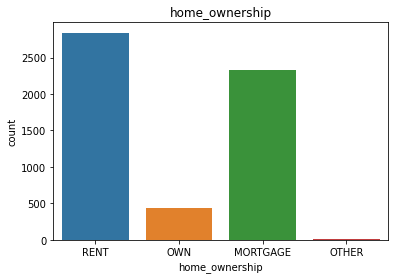

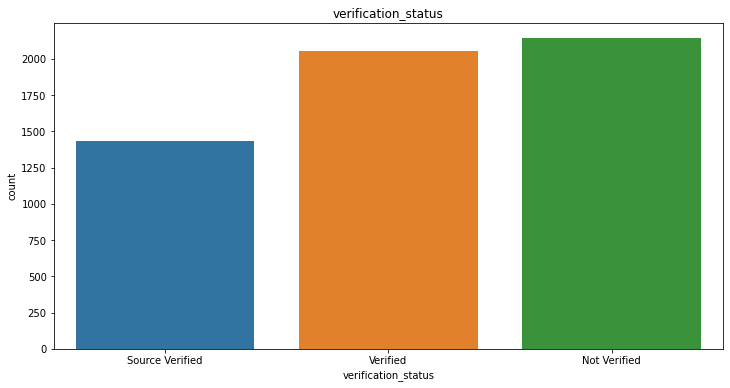

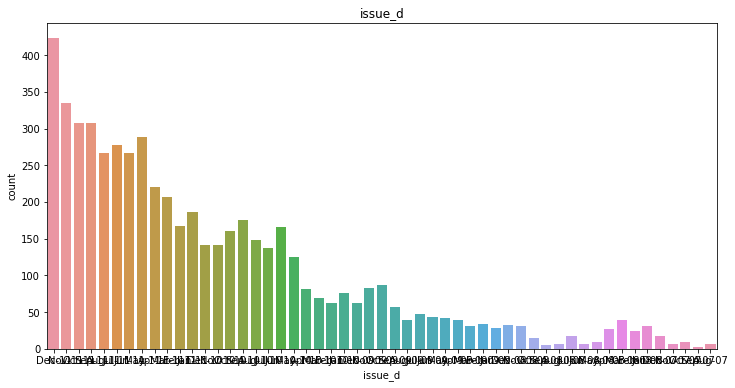

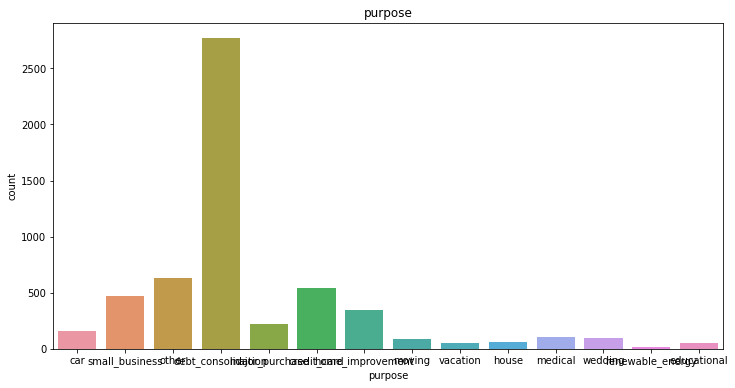

<Figure size 864x432 with 0 Axes>

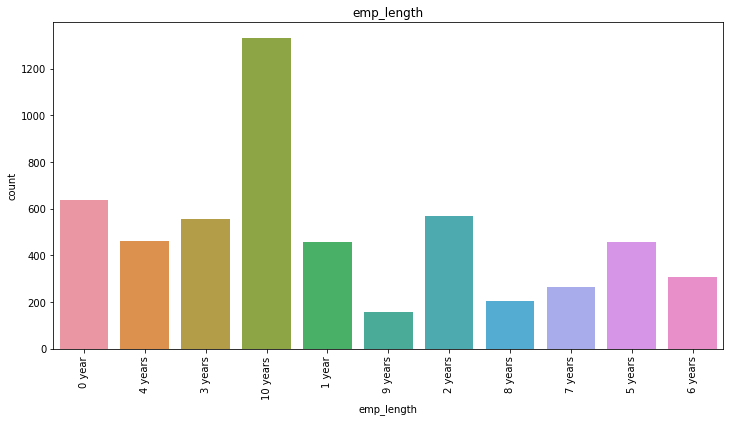

In [15]:
#declaring unordered categorical var and displaying countplot of variable against count of defaulters
unordered_cat_var = ['home_ownership', 'verification_status', 'issue_d', 'purpose', 'emp_length']
for i, var in enumerate(unordered_cat_var):
    plt.figure(figsize=(12,6))
    plt.figure(i)
    sns.countplot(x=var, data=df2)
    plt.title(var)
plt.xticks(rotation=90)
plt.show()

In [16]:
df2['date'] = pd.to_datetime(df2['issue_d'], format='%b-%y')

# extract month name from date column
df2['issue_m'] = df2['date'].dt.strftime('%b')

C:\Users\smathiva\AppData\Local\Temp\ipykernel_22500\4246998831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['issue_d'], format='%b-%y')
C:\Users\smathiva\AppData\Local\Temp\ipykernel_22500\4246998831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['issue_m'] = df2['date'].dt.strftime('%b')


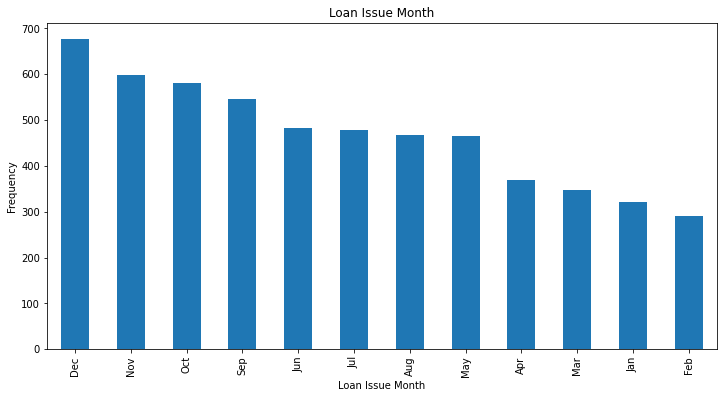

In [17]:
plt.figure(figsize=(12,6))
issue_d_table = df2['issue_m'].value_counts()
issue_d_table.plot(kind='bar')
plt.title('Loan Issue Month')
plt.xlabel('Loan Issue Month')
plt.ylabel('Frequency')
plt.show()

##### Ordered Categorical Variables - Univariate Analysis

In [18]:
# Declaring ordered categorical variable list
ordered_cat_var = ['grade', 'sub_grade', 'term']

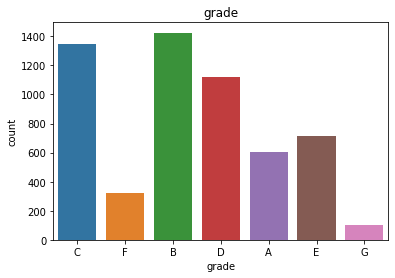

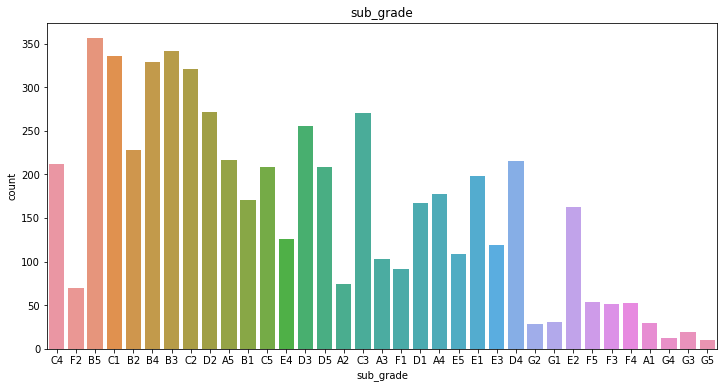

<Figure size 864x432 with 0 Axes>

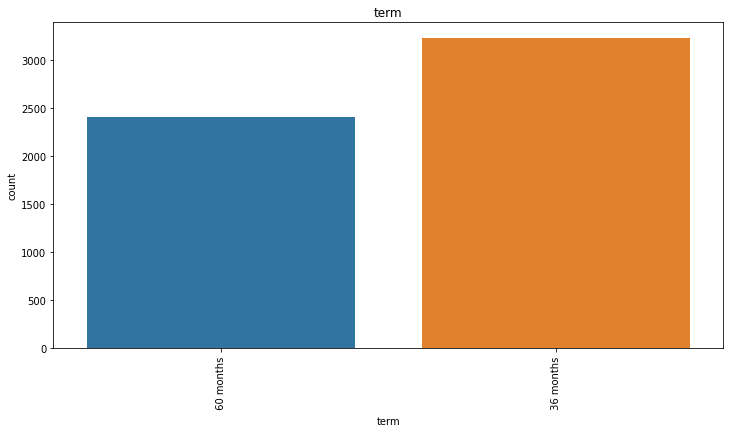

In [19]:
# countplot for ordered categorical variable against defaulters
for i, var in enumerate(ordered_cat_var):
    plt.figure(figsize=(12,6))
    plt.figure(i)
    sns.countplot(x=var, data=df2)
    plt.title(var)
plt.xticks(rotation=90)
plt.show()

##### Quantitative Variables - Univariate Analysis

In [20]:
# Declaring continous variable list
continous_variables = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti']

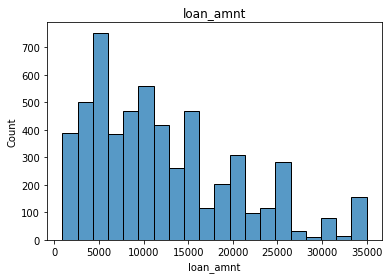

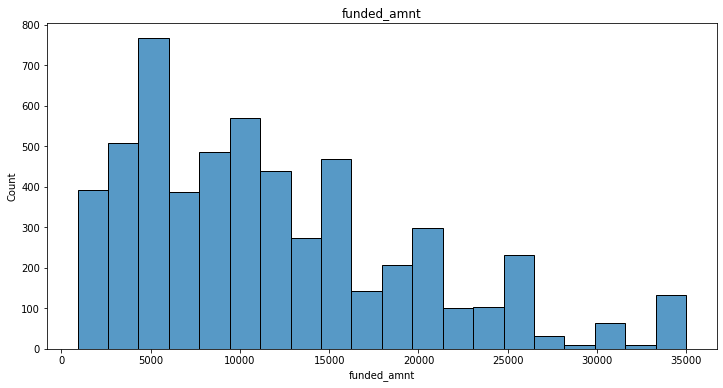

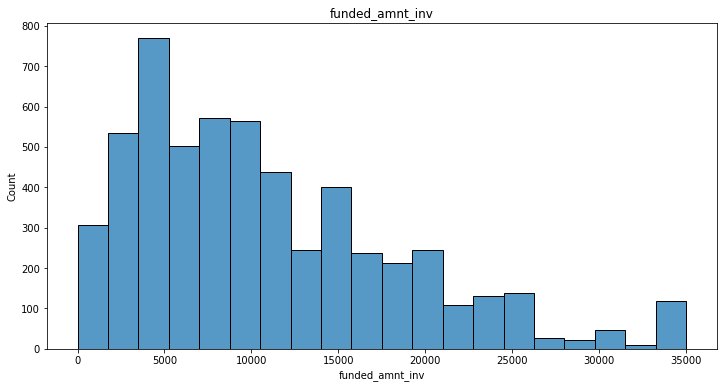

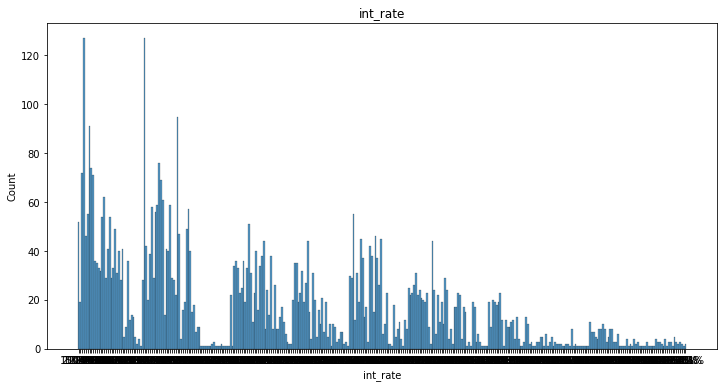

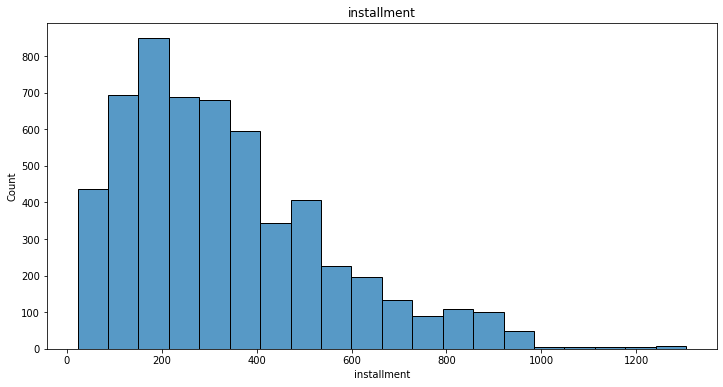

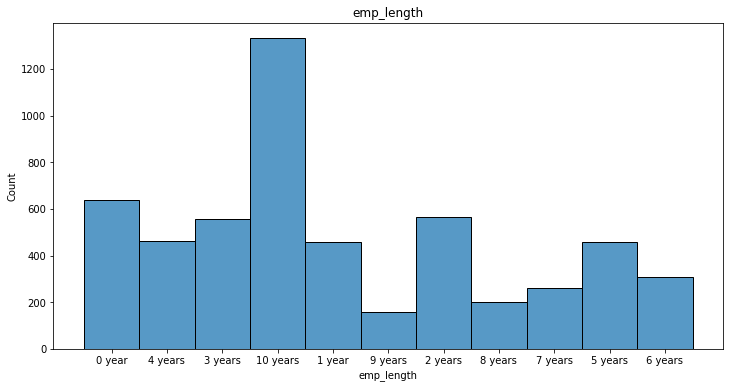

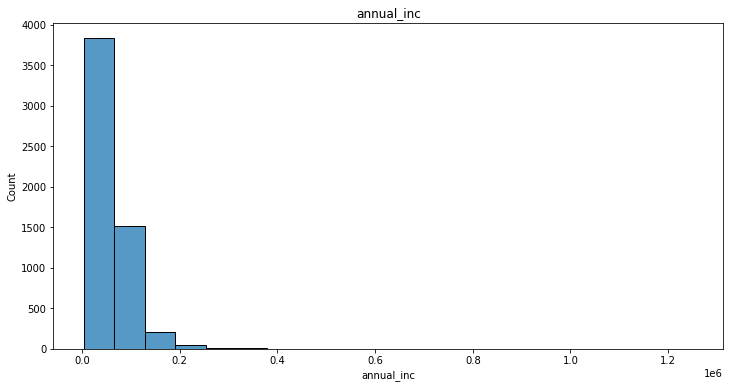

<Figure size 864x432 with 0 Axes>

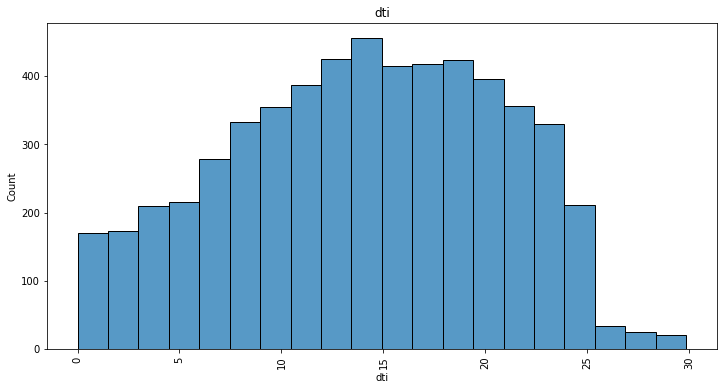

In [21]:
# histplot for continous variables against defaulters
for i, var in enumerate(continous_variables):
    plt.figure(figsize=(12,6))
    plt.figure(i)
    sns.histplot(data=df2, x=var, bins=20)
    plt.title(var)
plt.xticks(rotation=90)
plt.show()

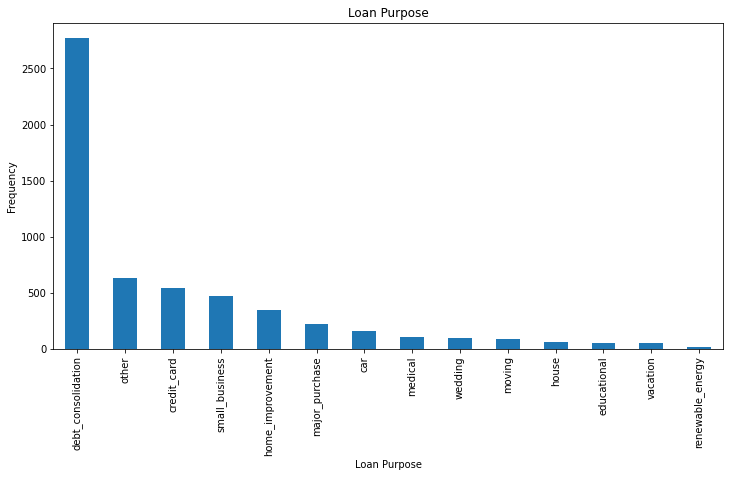

In [22]:
# count plot on defaulters
plt.figure(figsize=(12,6))
purpose_table = df2['purpose'].value_counts()
purpose_table.plot(kind='bar')
plt.title('Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')
plt.show()

##### Segmented Univariate

In [23]:
# Converting emp_length from String to float
years = ['0 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10 years']
for var in years:
    var1=var.split()[0]
#    print(var1)
    df2['emp_length'].where(df2['emp_length'] != var, other=var1, inplace=True)
df2['emp_length'] = df2['emp_length'].astype('float')

C:\Users\smathiva\AppData\Local\Temp\ipykernel_22500\2215824712.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['emp_length'].where(df2['emp_length'] != var, other=var1, inplace=True)
C:\Users\smathiva\AppData\Local\Temp\ipykernel_22500\2215824712.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['emp_length'] = df2['emp_length'].astype('float')


In [24]:
#Creating new dataframe and converting all continunous variable to INT
df3 = pd.DataFrame()
df2['int_rate_num'] = df2['int_rate'].str.rstrip('%').astype('float')
# Declaring the list of Continuous variable and this code is also going to remove all outliers for boxplot
continous_variables1 = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate_num', 'installment', 'emp_length', 'annual_inc', 'dti']
for var in continous_variables1:
    q3 = df2[var].quantile(0.75)
    q2 = df2[var].quantile(0.50)
    q1 = df2[var].quantile(0.25)
    q4 = df2[var].quantile(1)
    iqr = q3 - q1
    print ("\nIQR for continous variable:", var, "is:", iqr)
    df3[var]=np.where(df2[var]>df2[var].quantile(0.75)+1.5*iqr,df2[var].quantile(0.75)+1.5*iqr,df2[var])
    mean = df2[var].mean()
    median = df2[var].median()
    sd = df2[var].std()
    print ("\n Mean, Med & SD for", var, "is:", mean, median, sd)
    print ("\n q1, q2, q3 & q4", var, "is:", q1, q2, q3, q4)


IQR for continous variable: loan_amnt is: 10900.0

 Mean, Med & SD for loan_amnt is: 12104.385107517328 10000.0 8085.732038431093

 q1, q2, q3 & q4 loan_amnt is: 5600.0 10000.0 16500.0 35000.0

IQR for continous variable: funded_amnt is: 10425.0

 Mean, Med & SD for funded_amnt is: 11753.398791540785 10000.0 7760.516334589913

 q1, q2, q3 & q4 funded_amnt is: 5575.0 10000.0 16000.0 35000.0

IQR for continous variable: funded_amnt_inv is: 10000.0

 Mean, Med & SD for funded_amnt_inv is: 10864.523369468634 9401.0 7661.7476128064745

 q1, q2, q3 & q4 funded_amnt_inv is: 5000.0 9401.0 15000.0 35000.0

IQR for continous variable: int_rate_num is: 5.09

 Mean, Med & SD for int_rate_num is: 13.820431846454595 13.61 3.65441255882895

 q1, q2, q3 & q4 int_rate_num is: 11.309999999999999 13.61 16.4 24.4

IQR for continous variable: installment is: 289.285

 Mean, Med & SD for installment is: 336.1750062200107 293.87 217.0518411271835

 q1, q2, q3 & q4 installment is: 168.555 293.87 457.84000000

C:\Users\smathiva\AppData\Local\Temp\ipykernel_22500\1929091940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['int_rate_num'] = df2['int_rate'].str.rstrip('%').astype('float')


In [25]:
df3.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_num,installment,emp_length,annual_inc,dti
0,2500.0,2500.0,2500.0,15.27,59.83,0.0,30000.0,1.00
1,5600.0,5600.0,5600.0,21.28,152.39,4.0,40000.0,5.55
2,5375.0,5375.0,5350.0,12.69,121.45,0.0,15000.0,18.08
3,9000.0,9000.0,9000.0,13.49,305.38,0.0,30000.0,10.08
4,10000.0,10000.0,10000.0,10.65,325.74,3.0,100000.0,7.06


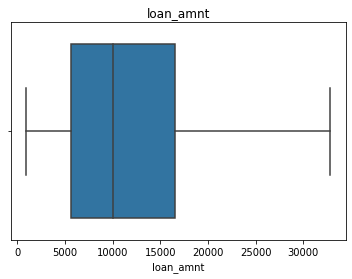

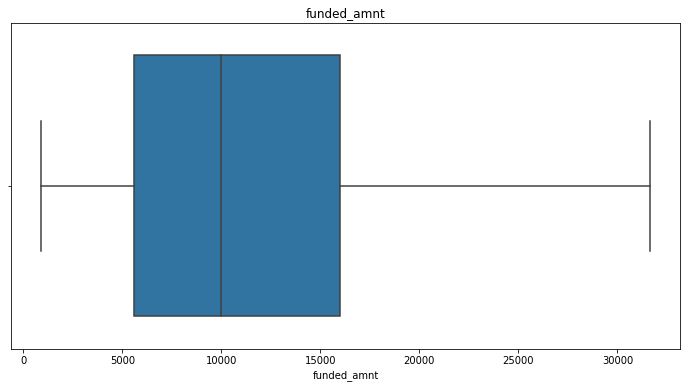

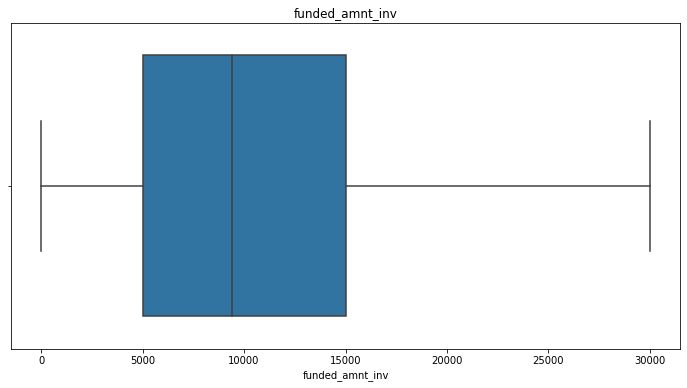

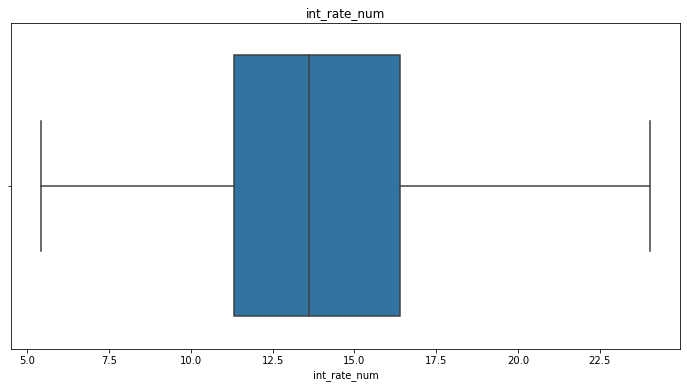

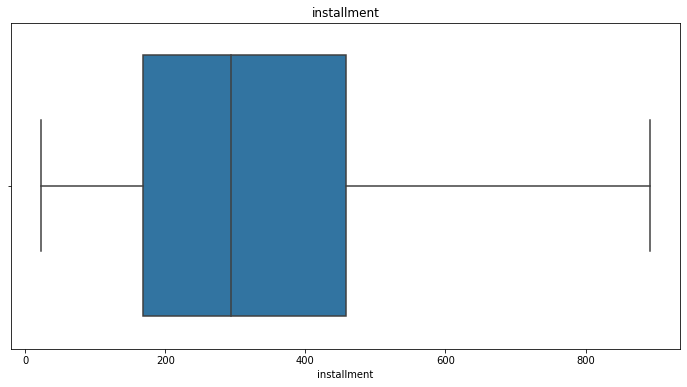

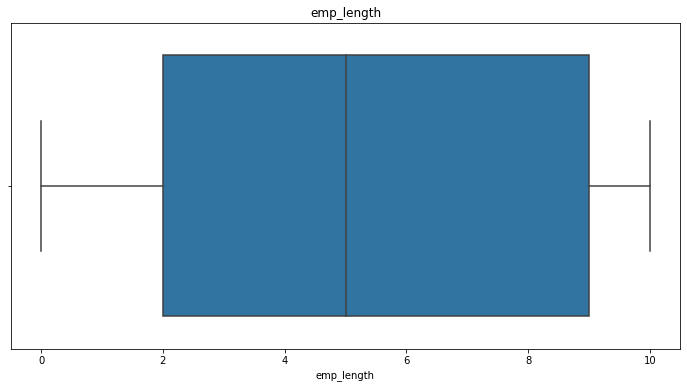

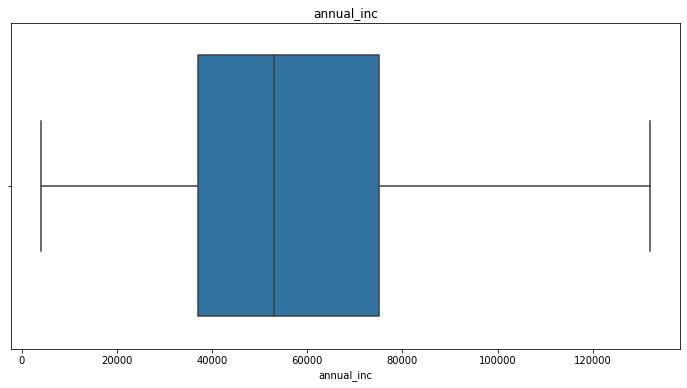

<Figure size 864x432 with 0 Axes>

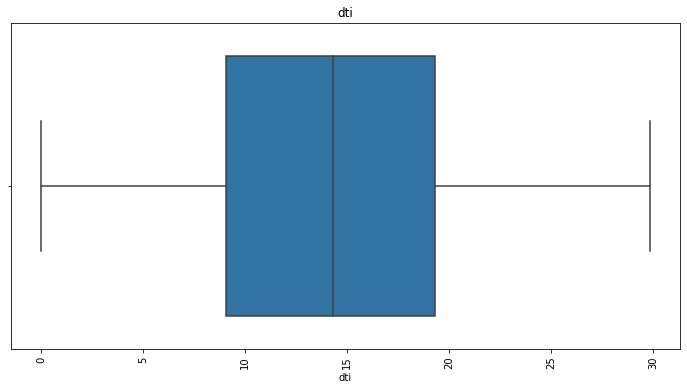

In [26]:
# Boxplot for Continuous variables and all outliers are been treated
for i, var in enumerate(continous_variables1):
    plt.figure(figsize=(12,6))
    plt.figure(i)
    sns.boxplot(data=df3, x=var)
    plt.title(var)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

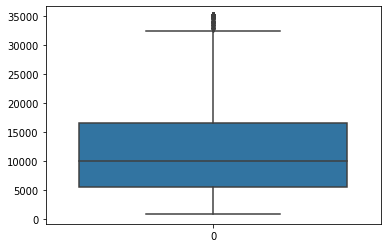

In [27]:
df2 = df2.reset_index(drop=True)
sns.boxplot(df2['loan_amnt'])

<AxesSubplot:>

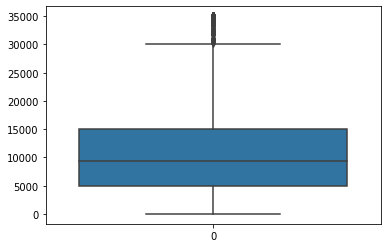

In [28]:
sns.boxplot(df2['funded_amnt_inv'])

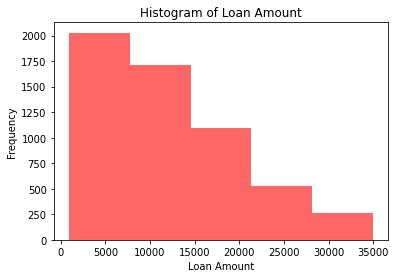

In [29]:
# histogram for loan amount for defaulters
plt.hist(df2['loan_amnt'], bins=5, color='Red', alpha=0.6)
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# display the histogram
plt.show()

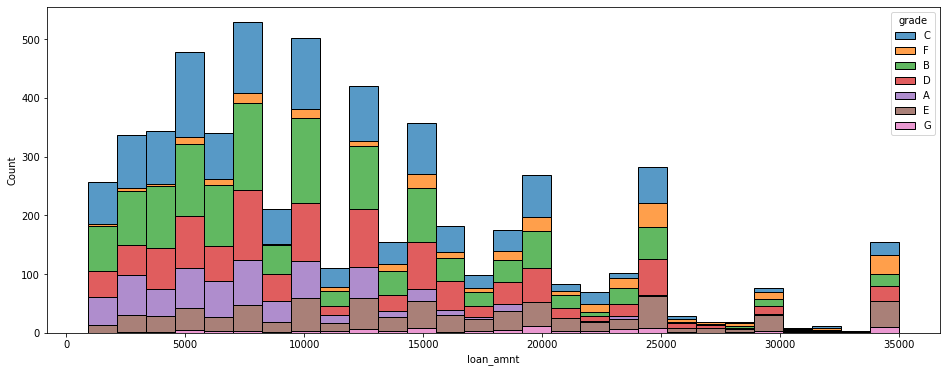

In [30]:
#histplot for loan amount vs grade
plt.figure(figsize=(16, 6))
sns.histplot(data=df2, x='loan_amnt', hue='grade', multiple='stack')
plt.show()

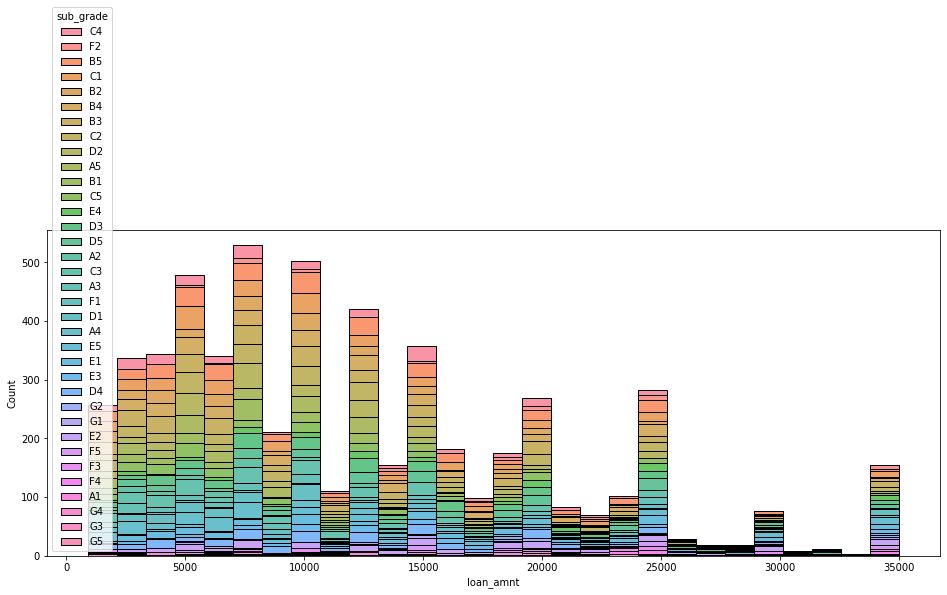

In [31]:
#histplot for loan amount vs sub grade
plt.figure(figsize=(16, 6))
sns.histplot(data=df2, x='loan_amnt', hue='sub_grade', multiple='stack')
plt.show()

##### Bivariate Analysis

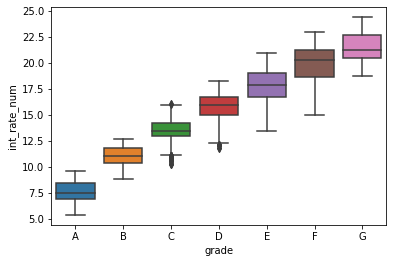

In [32]:
sns.boxplot(x='grade', y='int_rate_num', data=df2, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

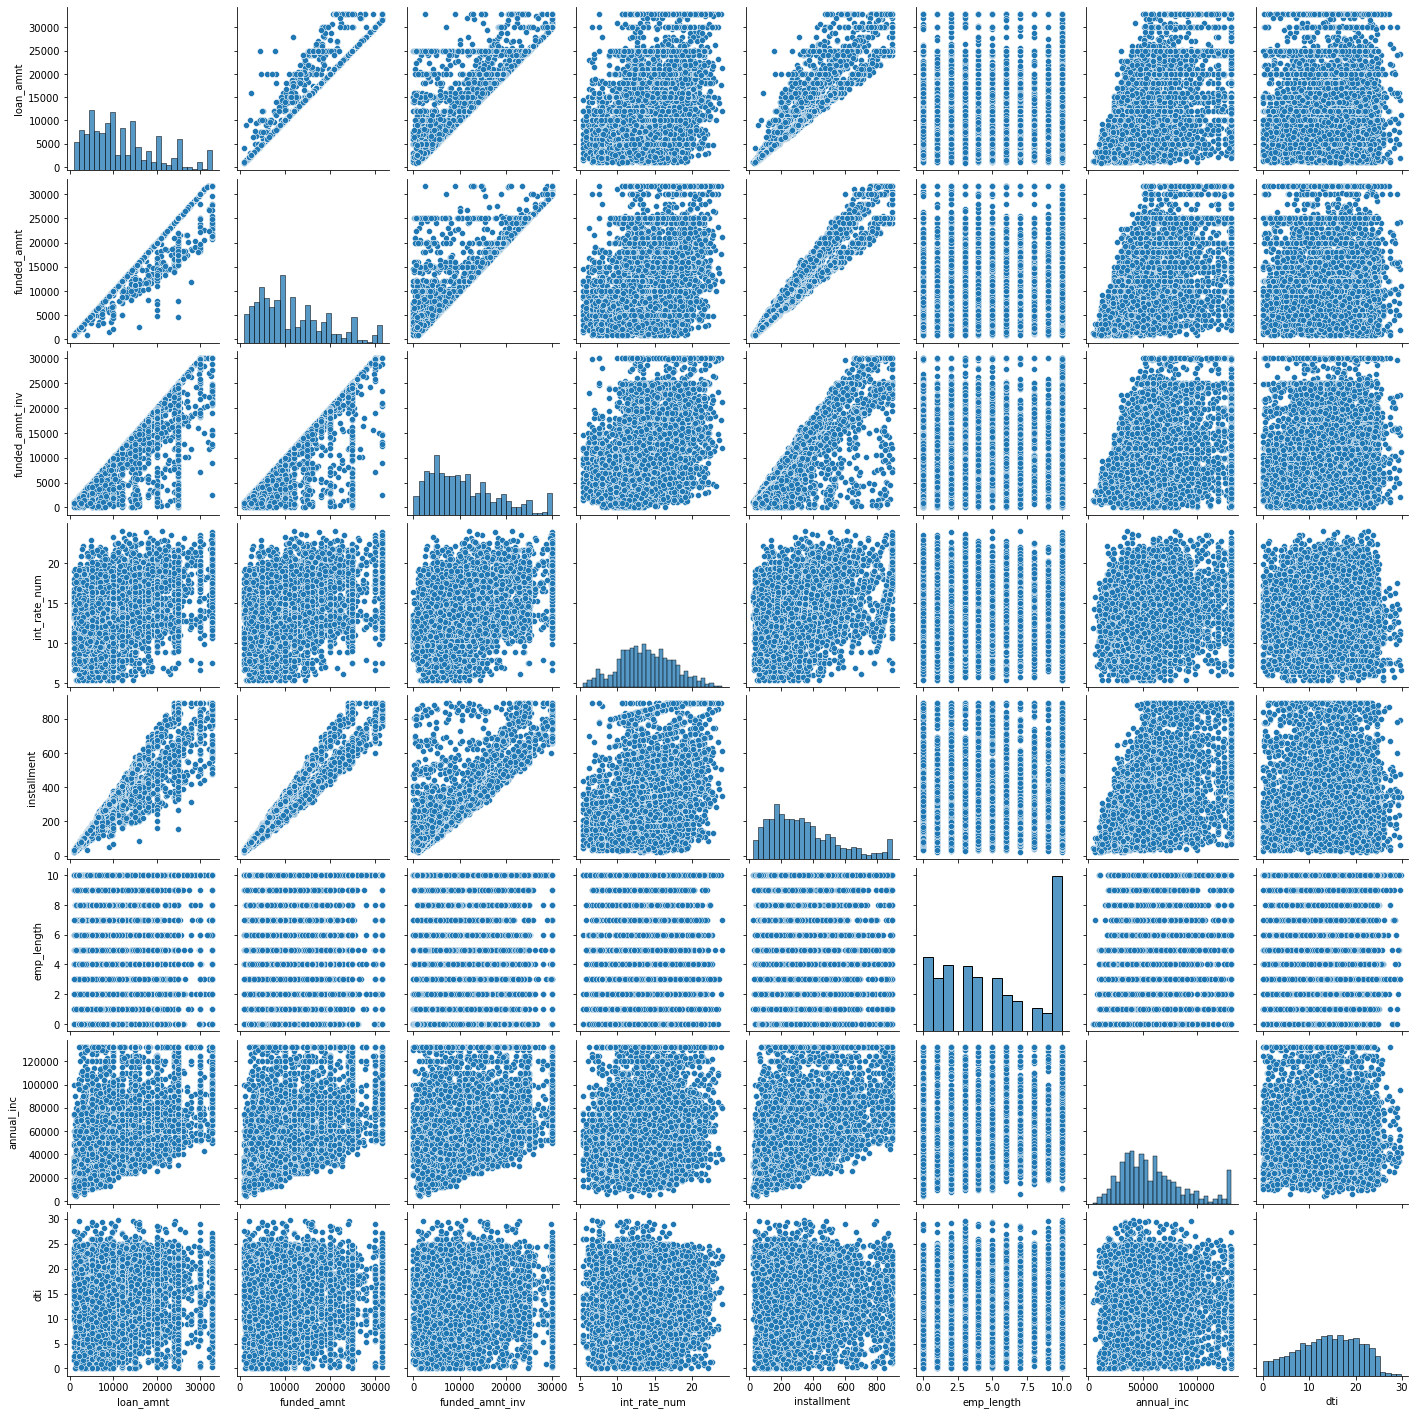

In [33]:
sns.pairplot(df3)

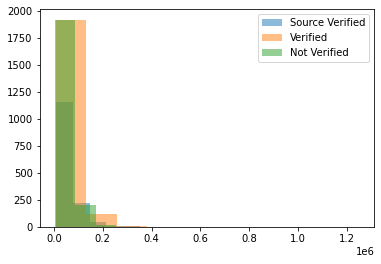

In [34]:
for status in df2['verification_status'].unique():
    subset = df2[df2['verification_status'] == status]
    plt.hist(subset['annual_inc'], alpha=0.5, label=status)
plt.legend()
plt.show()

<AxesSubplot:>

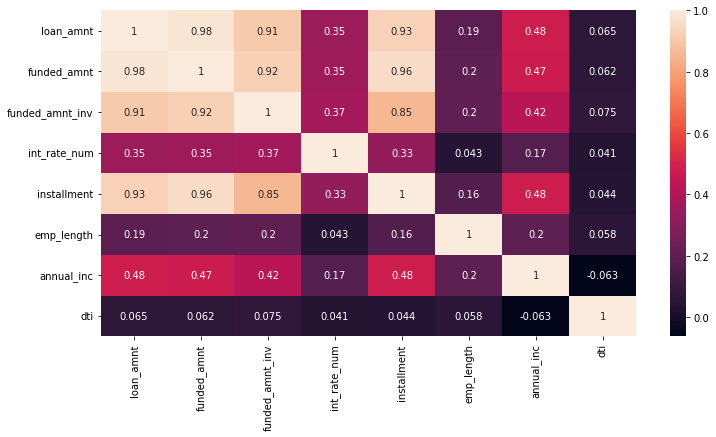

In [35]:
# to identify the correlation between Continuous variables
plt.figure(figsize=(12,6))
sns.heatmap(df3.corr(),annot=True)

In [36]:
# For Dataframe df3
for var in continous_variables1:
    q3 = df3[var].quantile(0.75)
    q2 = df3[var].quantile(0.50)
    q1 = df3[var].quantile(0.25)
    q4 = df3[var].quantile(1)
    iqr = q3 - q1
    mean = df3[var].mean()
    median = df3[var].median()
    sd = df3[var].std()
    print ("\n Mean, Med & SD for", var, "is:", mean, median, sd)
    print ("\n q1, q2, q3 & q4", var, "is:", q1, q2, q3, q4)


 Mean, Med & SD for loan_amnt is: 12045.712635507376 10000.0 7925.656915273955

 q1, q2, q3 & q4 loan_amnt is: 5600.0 10000.0 16500.0 32850.0

 Mean, Med & SD for funded_amnt is: 11674.402434689888 10000.0 7537.650364509196

 q1, q2, q3 & q4 funded_amnt is: 5575.0 10000.0 16000.0 31637.5

 Mean, Med & SD for funded_amnt_inv is: 10758.641727385819 9401.0 7357.801313684236

 q1, q2, q3 & q4 funded_amnt_inv is: 5000.0 9401.0 15000.0 30000.0

 Mean, Med & SD for int_rate_num is: 13.820353652034832 13.61 3.6541905718715606

 q1, q2, q3 & q4 int_rate_num is: 11.309999999999999 13.61 16.4 24.034999999999997

 Mean, Med & SD for installment is: 334.38216722942957 293.87 211.48606062269414

 q1, q2, q3 & q4 installment is: 168.555 293.87 457.84000000000003 891.7675

 Mean, Med & SD for emp_length is: 5.080940914984256 5.0 3.601326091136463

 q1, q2, q3 & q4 emp_length is: 2.0 5.0 9.0 10.0

 Mean, Med & SD for annual_inc is: 59203.46063621823 53000.0 29627.20060824632

 q1, q2, q3 & q4 annual_i